# Campus recruitment is a strategy for sourcing, engaging and hiring young talent for internship and entry-level positions.

College recruiting is typically a tactic for medium- to large-sized companies with high-volume recruiting needs, but can range 

from small efforts (like working with university career centers to source potential candidates) to large-scale operations (like 

visiting a wide array of colleges and attending recruiting events throughout the spring and fall semester). Campus recruitment 

often involves working with university career services centers and attending career fairs to meet in-person with college 

students and recent graduates.

Context of our Dataset: Our dataset revolves around the placement season of a Business School in India. Where it has various factors on candidates getting hired such as work experience,exam percentage etc., Finally it contains the status of recruitment and remuneration details.

# 2.Kernel Goals

There are three primary goals of this kernel.

-Do a exploratory analysis of the Recruitment dataset

-Do an visualization analysis of the Recruitment dataset

-Prediction: To predict whether a student got placed or not using classification models

# Importing libraries and exploring Data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting dataset and checking

In [5]:
df = pd.read_csv('Placement_Data_Full_Class.csv')

In [6]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


## Inference

-We have Gender and Educational qualification data


-We have all the educational performance(score) data

-We have the status of placement and salary details

-We can expect null values in salary as candidates who weren't placed would have no salary

-Status of placement is our target variable rest of them are independent variable except salary

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


### We have 215 candidate details and there are mixed datatypes in each column. We have few missing values in the salary column as expected since those are the people who didn't get hired

In [8]:
df.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

##### We have 1 integer,5 float and 8 object datatypes in our dataset

# Checking for missing data
Datasets in the real world are often messy, However, this dataset is almost clean and simple. Lets analyze and see what we have here.

<AxesSubplot:>

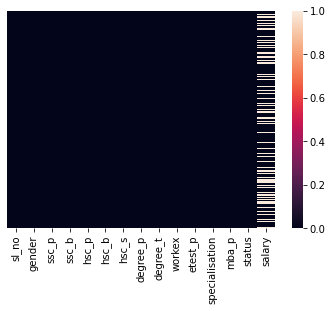

In [9]:
sns.heatmap(df.isnull() ,yticklabels= False )

As per our inference, we can visualize the null values in salary. Let's see the count

In [11]:
#lets count null values
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

# Inference

-There are 67 null values in our data, which means 67 unhired candidates.

-We can't drop these values as this will provide a valuable information on why candidates failed to get hired.

-We can't impute it with mean/median values and it will go against the context of this dataset and it will show unhired candidates got salary.

-Our best way to deal with these null values is to impute it with '0' which shows they don't have any income

In [12]:
df['salary'].fillna(value=0, inplace=True)
print("Salary coulmn with null values:- ")
df['salary'].isnull().sum()

Salary coulmn with null values:- 


0

#### we have cleared that Salary with zero null values. Now it's time to drop unwanted features !

In [13]:
df.drop(['sl_no','ssc_b','hsc_b'], axis = 1,inplace=True) 
df.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


We have dropped serial number as we have index as default and we have dropped the boards of school education as I believe it

doesn't matter for recruitment

# Cheking outliers

Text(0.5, 1.0, 'Employability percentage')

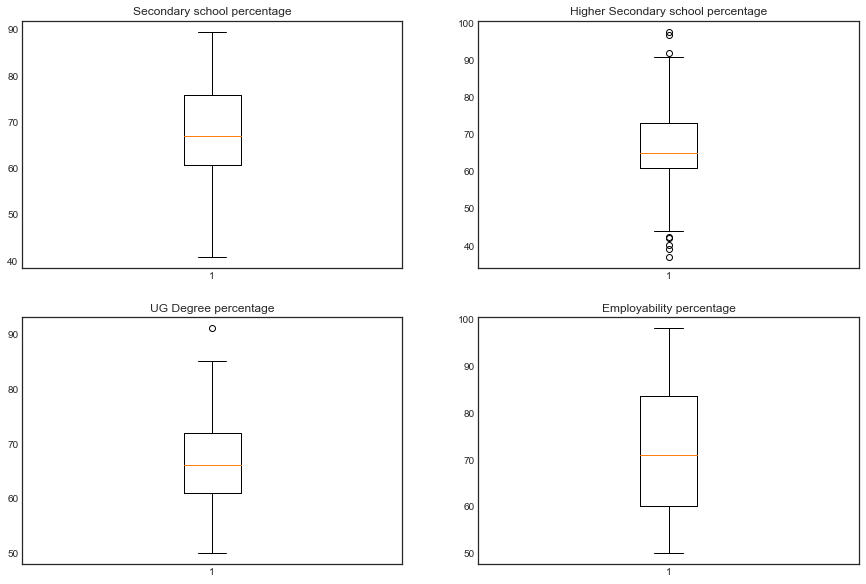

In [14]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(df['ssc_p'])
ax.set_title('Secondary school percentage')
ax=plt.subplot(222)
plt.boxplot(df['hsc_p'])
ax.set_title('Higher Secondary school percentage')
ax=plt.subplot(223)
plt.boxplot(df['degree_p'])
ax.set_title('UG Degree percentage')
ax=plt.subplot(224)
plt.boxplot(df['etest_p'])
ax.set_title('Employability percentage')

# Removing outliers 

In [16]:
Q1 = df['hsc_p'].quantile(0.25)
Q3 = df['hsc_p'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['hsc_p'] >= Q1 - 1.5 * IQR) & (df['hsc_p'] <= Q3 + 1.5 *IQR)
placement_filtered=df.loc[filter]


Text(0.5, 1.0, 'After removing outliers(hsc_p)')

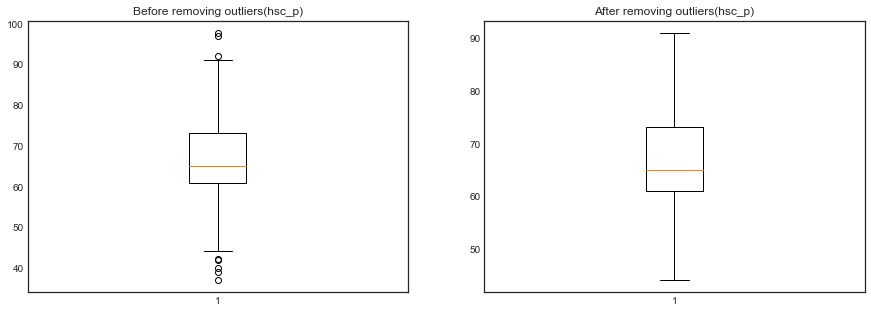

In [17]:
plt.figure(figsize = (15, 5))
plt.style.use('seaborn-white')
ax=plt.subplot(121)
plt.boxplot(df['hsc_p'])
ax.set_title('Before removing outliers(hsc_p)')
ax=plt.subplot(122)
plt.boxplot(placement_filtered['hsc_p'])
ax.set_title('After removing outliers(hsc_p)')

# Data Visualizations

C:\Users\shekh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


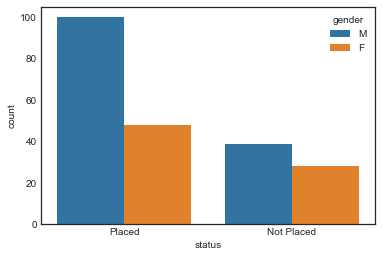

In [28]:
sns.countplot(df['status'],hue=df['gender'])
plt.show()

## Inference

-We have more male candidates than female

# .Work experience Vs Placement Status

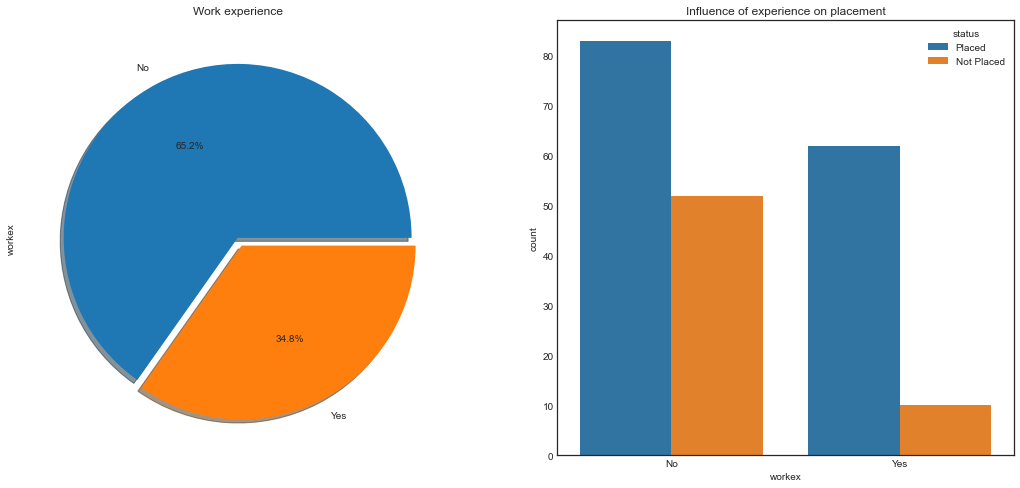

In [29]:
plt.style.use('seaborn-white')
f,ax=plt.subplots(1,2,figsize=(18,8))
placement_filtered['workex'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Work experience')
sns.countplot(x = 'workex',hue = "status",data = placement_filtered)
ax[1].set_title('Influence of experience on placement')
plt.show()

# Coorelation between academic percentages

<AxesSubplot:>

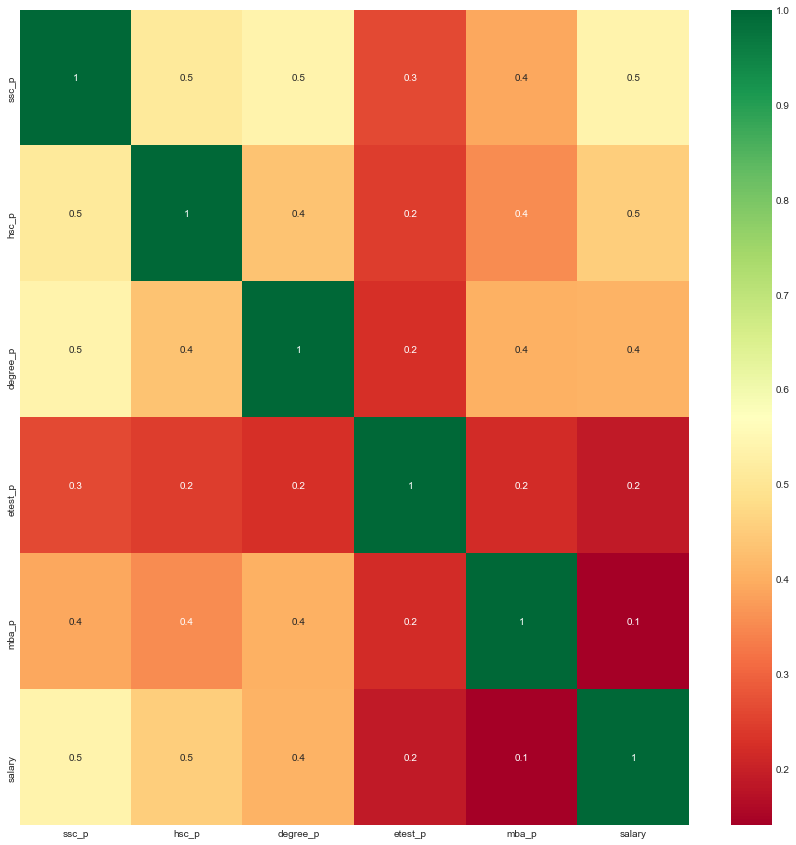

In [30]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(),annot=True,fmt='.1g',cmap='RdYlGn')

### Inference

-Candidates who were good in their academics performed well throughout school,undergrad,mba and even employability test

-These percentages don't have any influence over their salary

# Distribution of our data

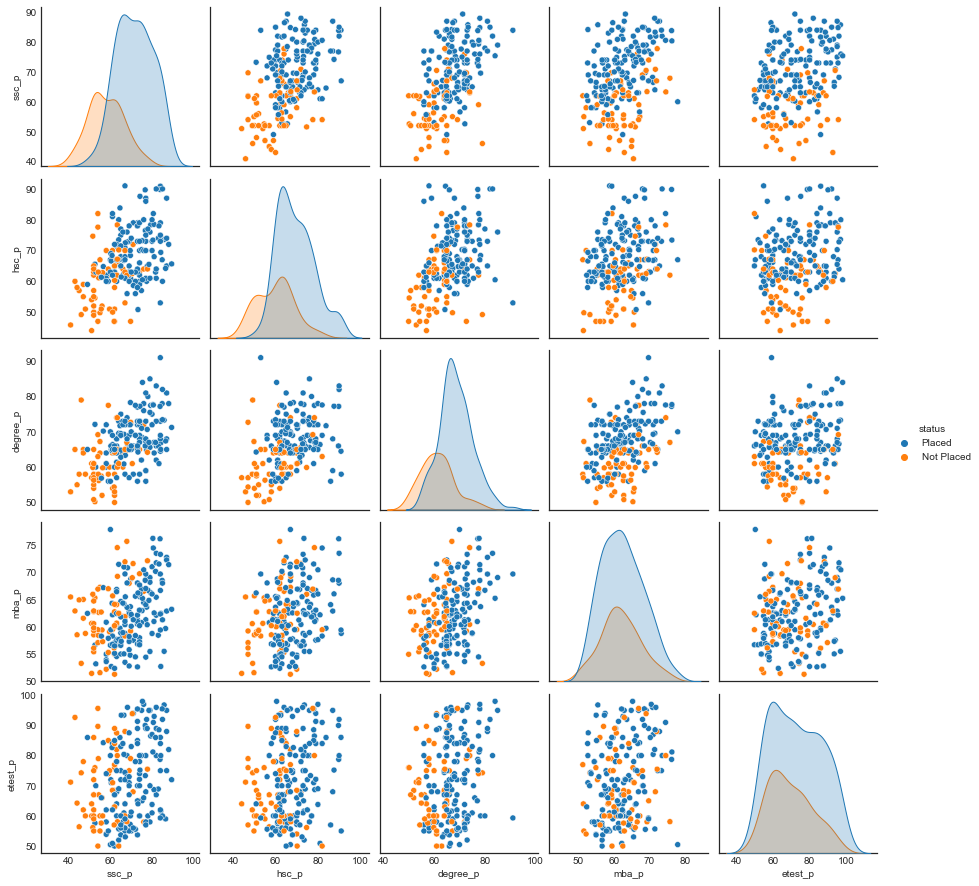

In [32]:
sns.pairplot(placement_filtered,vars=['ssc_p','hsc_p','degree_p','mba_p','etest_p'],hue="status")

### Inference

-Candidates who has high score in higher secondary and undergrad got placed

-Whomever got high scores in their schools got placed

-Comparing the number of students who got placed candidates who got good mba percentage and employability percentage

## Data Preprocessing data for classficiation models

#### Label encoding

In [33]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

# Make copy to avoid changing original data 
object_cols=['gender','workex','specialisation','status']

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    placement_filtered[col] = label_encoder.fit_transform(placement_filtered[col])
placement_filtered.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,91.00,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,1,79.33,78.33,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,1,65.00,68.00,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,1,56.00,52.00,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,0.0
4,1,85.80,73.60,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0


# one hot coding

In [36]:
dummy_hsc_s=pd.get_dummies(placement_filtered['hsc_s'], prefix='dummy')
dummy_degree_t=pd.get_dummies(placement_filtered['degree_t'], prefix='dummy')
placement_coded = pd.concat([placement_filtered,dummy_hsc_s,dummy_degree_t],axis=1)
placement_coded.drop(['hsc_s','degree_t','salary'],axis=1, inplace=True)
placement_coded.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,67.00,91.00,58.00,0,55.0,1,58.80,1,0,1,0,0,0,1
1,1,79.33,78.33,77.48,1,86.5,0,66.28,1,0,0,1,0,0,1
2,1,65.00,68.00,64.00,0,75.0,0,57.80,1,1,0,0,1,0,0
3,1,56.00,52.00,52.00,0,66.0,1,59.43,0,0,0,1,0,0,1
4,1,85.80,73.60,73.30,0,96.8,0,55.50,1,0,1,0,1,0,0


In [37]:
feature_cols=['gender','ssc_p','hsc_p','hsc_p','workex','etest_p','specialisation','mba_p',
              'dummy_Arts','dummy_Commerce','dummy_Science','dummy_Comm&Mgmt','dummy_Others','dummy_Sci&Tech']
len(feature_cols)

14

# 6 Assigning the target(y) and predictor variable(X)
Our Target is to find whether the candidate is placed or not. We use rest of the features except 'salary' as this won't 

contribute in prediction(i.e) In real world scenario, students gets salary after they get placed, so we can't use a future 

feature to predict something which happens in the present

In [39]:
X=placement_coded.drop(['status'],axis=1)
y=placement_coded.status

# Spliting data into train and test

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=1)

# Machine Learning models


Now let's feed the models with our data Objective: To predict whether a student got placed or not

### Logistic Regression
Let's fit the model in logistic regression and figure out the accuracy of our model

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.81


# 83% accurate. That's really good. Let's check out confusion matrix and see the classification report

Confusion matrix and Classification report

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
from sklearn.metrics import classification_report
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 8  7]
 [ 1 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.53      0.67        15
           1       0.79      0.96      0.87        27

    accuracy                           0.81        42
   macro avg       0.84      0.75      0.77        42
weighted avg       0.82      0.81      0.80        42



## Insights:
The Confusion matrix result is telling us that we have 9+26 correct predictions and 1+6 incorrect predictions. The Classification report reveals that we have 84% precision which means the accuracy that the model classifier not to label an instance positive that is actually negative and it is important to consider precision value because when you are hiring, you want to avoid Type I errors at all cost. They are culture killers.In hiring, a false positive is when you THINK an employee is a good fit, but in actuality they’re not.

#  Decision Tree
Let's checkout how the model makes the decision using Decision Tree Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier
rt=RandomForestClassifier(n_estimators=100)
rt.fit(X_train,y_train)
y_pred=rt.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7857142857142857


##### We have an accuracy of 83%. Not bad. But let's try check out important features and try to boost the precision

# knn model

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

acc_list = []
err_list = []
for i in range(1,25):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    acc_list.append(acc)
    err_list.append(1-acc)

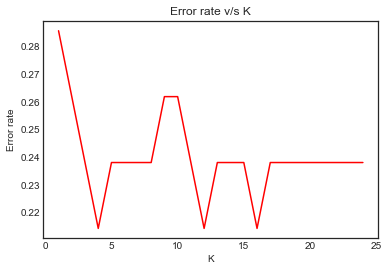

In [49]:
plt.plot(list(range(1,25)),err_list,c= 'r')
plt.title('Error rate v/s K')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()

# NOTE : from the above graph we can select k value as 5
Model building

In [50]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [51]:
accuracy_score(y_test,y_pred)

0.7619047619047619

In [52]:
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 6  9]
 [ 1 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.40      0.55        15
           1       0.74      0.96      0.84        27

    accuracy                           0.76        42
   macro avg       0.80      0.68      0.69        42
weighted avg       0.78      0.76      0.73        42



# Insights:


Our model has precisely classified 86% of Not placed categories and 74% of Placed categories

To talk in numbers 26+6 correct classifications and 1+9 false negative and false positive classification.

We should be considering the precision value as our metric because the possibility of commiting False Positive is very crucial 

in recuritment